In [1]:
import pandas as pd
from statsbombpy import sb

df = sb.events(match_id=3869685)

C:\Users\knich\Desktop\mckayjohns football analytics\football-analytics-python\env\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [2]:
print(df.player.value_counts())

player
Enzo Fernandez                     328
Rodrigo Javier De Paul             242
Lionel Andrés Messi Cuccittini     242
Nicolás Hernán Otamendi            215
Jules Koundé                       211
Aurélien Djani Tchouaméni          205
Cristian Gabriel Romero            203
Dayotchanculle Upamecano           198
Alexis Mac Allister                196
Raphaël Varane                     182
Adrien Rabiot                      176
Nicolás Alejandro Tagliafico       165
Julián Álvarez                     150
Kylian Mbappé Lottin               149
Theo Bernard François Hernández    145
Nahuel Molina Lucero               142
Ángel Fabián Di María Hernández    132
Randal Kolo Muani                  127
Marcus Thuram                      119
Marcos Javier Acuña                112
Antoine Griezmann                  103
Hugo Lloris                         97
Kingsley Coman                      85
Damián Emiliano Martínez            83
Eduardo Camavinga                   83
Gonzalo Ariel Mont

In [3]:
df = df[(df['player'] == 'Enzo Fernandez') & (df['type'] == 'Pass')]

In [4]:
df.head(15)

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:03:43.780,Pass,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:04:54.065,Pass,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:07:09.412,Pass,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:07:25.776,Pass,NaN
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:11:36.630,Pass,NaN
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:11:48.798,Pass,NaN
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:13:30.285,Pass,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:14:52.428,Pass,NaN
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:15:09.982,Pass,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:15:12.415,Pass,NaN


In [5]:
df = df[['location', 'pass_end_location', 'pass_outcome']]

In [6]:
df.head()

,location,pass_end_location,pass_outcome
48,"[54.8, 37.8]","[56.5, 60.5]",NaN
70,"[56.5, 39.7]","[66.4, 42.9]",Incomplete
102,"[34.3, 50.2]","[38.8, 53.4]",NaN
107,"[88.0, 23.9]","[93.7, 20.3]",Incomplete
128,"[33.9, 51.1]","[112.1, 58.1]",Incomplete


In [7]:
df[['x', 'y']] = df['location'].apply(pd.Series)

In [8]:
df.head()


,location,pass_end_location,pass_outcome,x,y
48,"[54.8, 37.8]","[56.5, 60.5]",NaN,54.8,37.8
70,"[56.5, 39.7]","[66.4, 42.9]",Incomplete,56.5,39.7
102,"[34.3, 50.2]","[38.8, 53.4]",NaN,34.3,50.2
107,"[88.0, 23.9]","[93.7, 20.3]",Incomplete,88.0,23.9
128,"[33.9, 51.1]","[112.1, 58.1]",Incomplete,33.9,51.1


In [10]:
df[['end_x', 'end_y']] = df['pass_end_location'].apply(pd.Series)
df['pass_outcome'] = df['pass_outcome'].fillna("Complete")

In [11]:
df.head()

,location,pass_end_location,pass_outcome,x,y,end_x,end_y
48,"[54.8, 37.8]","[56.5, 60.5]",Complete,54.8,37.8,56.5,60.5
70,"[56.5, 39.7]","[66.4, 42.9]",Incomplete,56.5,39.7,66.4,42.9
102,"[34.3, 50.2]","[38.8, 53.4]",Complete,34.3,50.2,38.8,53.4
107,"[88.0, 23.9]","[93.7, 20.3]",Incomplete,88.0,23.9,93.7,20.3
128,"[33.9, 51.1]","[112.1, 58.1]",Incomplete,33.9,51.1,112.1,58.1


In [12]:
df['entered_final_third'] = (df['end_x'] >= 80) & (df['x'] < 80)

In [13]:
df.entered_final_third.value_counts()

entered_final_third
False    83
True     11
Name: count, dtype: int64

In [14]:
df = df[df['entered_final_third'] == True]

In [15]:
df.head()

,location,pass_end_location,pass_outcome,x,y,end_x,end_y,entered_final_third
128,"[33.9, 51.1]","[112.1, 58.1]",Incomplete,33.9,51.1,112.1,58.1,True
271,"[77.9, 57.5]","[81.1, 73.9]",Complete,77.9,57.5,81.1,73.9,True
331,"[70.4, 52.1]","[81.3, 74.4]",Complete,70.4,52.1,81.3,74.4,True
440,"[54.4, 40.6]","[102.3, 6.6]",Complete,54.4,40.6,102.3,6.6,True
523,"[79.0, 16.0]","[81.8, 19.4]",Incomplete,79.0,16.0,81.8,19.4,True


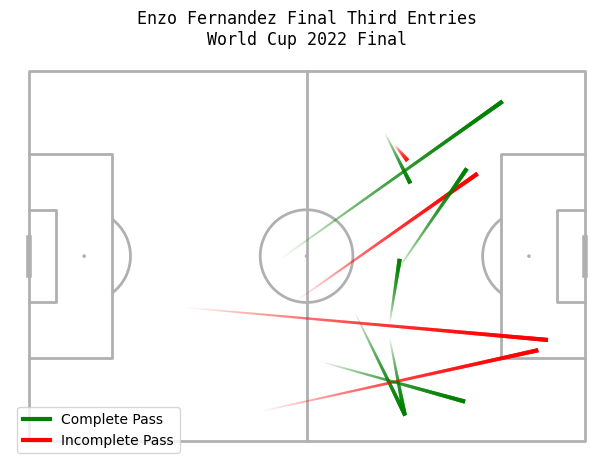

In [23]:
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb')

fig, ax = pitch.draw()

for x in df.to_dict(orient='records'):
    if x['pass_outcome'] == "Complete":
        pitch.lines(x['x'], x['y'], x['end_x'], x['end_y'], lw=3, transparent=True, comet=True, ax=ax, color='g')
    else:
        pitch.lines(x['x'], x['y'], x['end_x'], x['end_y'], lw=3, transparent=True, comet=True, ax=ax, color='r')

ax.set_title("Enzo Fernandez Final Third Entries\nWorld Cup 2022 Final", fontsize=12, fontfamily="monospace")

from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color='g', lw=3, label="Complete Pass"),
    Line2D([0], [0], color='r', lw=3, label="Incomplete Pass")
]

ax.legend(handles=legend_elements, loc='lower left')